# GensimによるWord2Vecの学習と使用

前章でCBOWモデルを実装することでword2vecの仕組みを学びました。実際に、その以外、word2vecの関して様々な取り組みがあります。

- Skip-gramモデルでは、ターゲットからコンテキストを推測するタスクを構築しています
- Negative Samplingという新しい損失関数を導入することで学習の高速化を図る

応用の視点から、これらの手法をすべでゼロから実装することが難しいので、[gensim](https://radimrehurek.com/gensim/index.html)というライブラリを使って、Word2Vecモデルを学習、管理、使用することは、多くの自然言語処理タスクにおいて効果的な選択肢となります。

In [1]:
#!pip install --upgrade gensim

## Gensimの使い方

### Gensimによる学習

In [2]:
from gensim.models import Word2Vec

sample_sents = [['you', 'say', 'goodbye', 'and', 'I', "say", "hello" '.']]
model = Word2Vec(sentences=sample_sents, vector_size=5, window=1, min_count=1)

ModuleNotFoundError: No module named 'gensim'

In [53]:
model.wv['you']

array([-0.06810732, -0.01892803,  0.11537147, -0.15043275, -0.07872207],
      dtype=float32)

| オプション    | 説明                                                                                          |
|---------------|-----------------------------------------------------------------------------------------------|
| sentences    | 元となるコーパス．単語リストのリスト．                                                        |
| corpus_file | コーパスをファイル読み込みする場合に指定．1行1文の形式で，単語は空白区切りで認識される．      |
| vector_size         | 分散表現の次元．リファレンスではvector_sizeと書いてあるように見えるが，sizeでないと動かない． |
| window      | 学習時に利用されるコンテキストの長さ．                                                                |
| min_count    | 分散表現を獲得する単語の最小頻度                                                              |
| workers       | 学習時の使用スレッド数．                                                                      |
| sg           | 学習アルゴリズムの選択．$1$ならskip-gram，$0$ならCBOW．                                           |

In [54]:
with open('./Data/lee_background.cor', 'r') as file:
    corpus = file.readlines()

In [55]:
processed_corpus = [line.lower().split() for line in corpus]

In [56]:
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=5)

````{tab-set}
```{tab-item} 課題
[ドキュメント](https://radimrehurek.com/gensim/models/word2vec.html#)を参照しながら、以下の指示に従ってモデルを実装してください。

- コーパスファイルパスを指定する形でコーパスを導入しなさい
- 学習方法は``skip-gram``を使う
- negative samplingを使う

```

````

### Gensimによる日本語モデル学習

In [57]:
import MeCab
def tokenize(text):
    """ テキストを形態素解析して、トークンのリストを返す """
    mecab = MeCab.Tagger("-Owakati")
    return mecab.parse(text).strip().split()

In [58]:
documents = ["これはサンプルの文書です。", "Word2Vecの学習を行います。"]

# 形態素解析を行い、単語リストに変換
tokenized_documents = [tokenize(doc) for doc in documents]


In [59]:
# Word2Vecモデルの訓練

model_jp = Word2Vec(sentences=tokenized_documents, vector_size=100, window=5, min_count=1, workers=4)

### モデルの使い方

モデルには,``wv``というオブジェクトに単語と単語分散表現の情報が格納されています。さらに、学習済みの単語ベクトルにアクセスし、それらを操作するための主要なインターフェースを提供します。

- 単語ベクトルの取得: ``model.wv['word']`` で特定の単語のベクトルを取得できます。

In [60]:
model.wv['you']

array([-0.00307982,  0.22879797,  0.1039058 ,  0.20323835,  0.06537586,
       -0.7105258 ,  0.29213727,  0.8992749 , -0.35582012, -0.41452944,
       -0.25418743, -0.6508533 , -0.24561188,  0.07932971,  0.13662694,
       -0.20141453,  0.12215281, -0.20007145,  0.12770739, -0.9059785 ,
        0.22014627,  0.20409352,  0.40092307, -0.16720138, -0.13147773,
       -0.14637163, -0.53138137, -0.1440311 , -0.3737898 ,  0.05188401,
        0.5665317 , -0.08456989,  0.38040233, -0.6733446 , -0.08252468,
        0.34136096,  0.18737307, -0.3356112 , -0.4150798 , -0.5506394 ,
        0.15834768, -0.29411098, -0.3682792 ,  0.22682002,  0.24956211,
       -0.19739659, -0.38888448, -0.06427043,  0.23042367,  0.3532887 ,
        0.20195435, -0.26739174, -0.22128567, -0.11839921, -0.20650993,
       -0.02059098,  0.2107421 , -0.14380229, -0.39475212,  0.08770867,
       -0.06955902,  0.13645834,  0.0296844 ,  0.01068899, -0.56741667,
        0.50749815,  0.04701915,  0.14689498, -0.4699005 ,  0.30

- 類似度の計算: ```model.wv.similarity('word1', 'word2')``` で2つの単語間の類似度を計算できます。

In [61]:
model.wv.similarity("you", "your")

0.99927604

- 最も類似した単語の取得: ```model.wv.most_similar('word')``` で特定の単語に最も類似した単語を取得できます

In [62]:
model.wv.most_similar("you")

[('this', 0.9997385740280151),
 ('last', 0.9997153282165527),
 ('police', 0.9997124075889587),
 ('were', 0.999710738658905),
 ('with', 0.999710202217102),
 ('also', 0.999708890914917),
 ('us', 0.9997062087059021),
 ('are', 0.9997057914733887),
 ('over', 0.9997038245201111),
 ('some', 0.9996989965438843)]

```{note}

Gensimで学習済みモデルを使用する方法は、モデルの種類と読み込み方法によって異なります。通常は、通常は``wv``を介してベクトルにアクセスしますが、``KeyedVectors``を使用する場合、``KeyedVectors``自体が単語ベクトルへの直接アクセスを提供するので、``wv``は不要です。

```

### モデルの管理

In [26]:
# モデルの保存と読み込み
#model.save("word2vec.model")
#model = Word2Vec.load("word2vec.model")

#### 学習済みモデルの読み込み

Gensimはいくつかの学習済みモデルを提供して、簡単に読み込むことができます。

In [27]:
import gensim.downloader

print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [66]:
model = gensim.downloader.load('word2vec-google-news-300')

In [44]:
similarity = model.similarity('woman', 'man')
similarity

0.76640123

````{tab-set}
```{tab-item} 課題
学習済みモデルを読み込み、$vec(king) - vec(man) + vec(woman)$を計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．
```
````

その他、各言語の学習済みモデルが多数公開されています。

| Name                                                                                   | Model                                               | Data                       | Dim            | Tokenizer  | Dict                |
| -------------------------------------------------------------------------------------- | --------------------------------------------------- | -------------------------- | -------------- | ---------- | ------------------- |
| [WikiEntVec](https://github.com/singletongue/WikiEntVec/)                              | Skip-gram                                          | Wikipedia                  | 100,200,300    | mecab      | mecab-ipadic-NEologd|
| [白ヤギ](https://github.com/shiroyagicorp/japanese-word2vec-model-builder)             | CBOW                                               | Wikipedia                  | 50             | mecab      | mecab-ipadic-NEologd|
| [chiVe](https://github.com/WorksApplications/chiVe)                                    | Skip-gram                                           | NWJC                       | 300            | Sudachi    |                     |
| [bizreach](https://github.com/bizreach/ai/tree/master/word2vec)                        | Skip-gram                                           | 求人データ                 | 100, 200       | mecab      | ipadic              |
| [dependency-based-japanese-word-embeddings](https://github.com/lapras-inc/dependency-based-japanese-word-embeddings) | [Dependency-Based Word Embeddings](https://levyomer.wordpress.com/2014/04/25/dependency-based-word-embeddings/) | Wikipedia                  | 100, 200, 300  | Ginza      |                     |
| [fastText](https://github.com/facebookresearch/fastText/blob/master/docs/crawl-vectors.md) | CBOW                                                | Common Crawl, Wikipedia    | 300            | mecab      | ?                   |
| [wikipedia2vec](https://github.com/wikipedia2vec/wikipedia2vec)                        | Skip-gram                                           | Wikipedia                  | 100, 300       | mecab      | ?                   |
| [wordvectors](https://github.com/Kyubyong/wordvectors)                                 | Skip-gram, fastText                                | Wikipedia                  | 300            | mecab      | ?                   |



### 単語分散表現の可視化

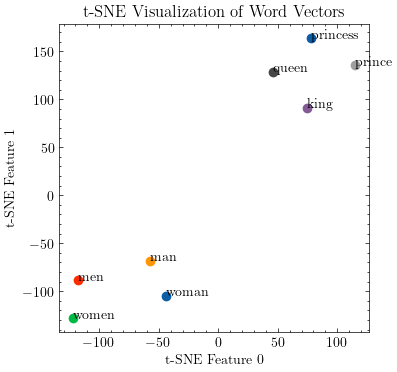

In [50]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import scienceplots
plt.style.use('science')

# List of words to visualize
words = ['woman', 'women', 'man', 'men', 'king', 'queen', 'prince', 'princess']

# Check if the words are in the model to avoid KeyError
vectors = [model[word] for word in words if word in model]

# Converting list of vectors to a numpy array
vectors_array = np.array(vectors)

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0, perplexity=3)
vectors_tsne = tsne.fit_transform(vectors_array)

# Visualization
plt.figure(figsize=(4, 4))
for i, word in enumerate(words):
    if word in model:
        plt.scatter(vectors_tsne[i, 0], vectors_tsne[i, 1])
        plt.annotate(word, (vectors_tsne[i, 0], vectors_tsne[i, 1]))

plt.xlabel('t-SNE Feature 0')
plt.ylabel('t-SNE Feature 1')
plt.title('t-SNE Visualization of Word Vectors')
plt.show()

### tensorboardで単語分散表現の可視化

可視化の際に用いられるツールとしては、TensorFlowのツールの一つであるTensorBoardが、豊富な機能とインタラクティブな操作性を備えています。

In [75]:
from tensorboardX import SummaryWriter
import torch

In [72]:
# 分散表現・単語のリストを取得
weights = model.vectors
labels = model.index_to_key

In [73]:
weights = weights[:1000]
labels = labels[:1000]

In [77]:
writer = SummaryWriter('runs/google_embeddings')
writer.add_embedding(torch.FloatTensor(weights), metadata=labels)

上記スクリプトを実行すると、実行されたディレクトリにデータが作成されます。TensorBoardの起動時にrunsディレクトリを指定することで、変換した単語の分散表現が可視化できます。

```
tensorboard --logdir=runs
```

上記コマンドを実行した状態で ```http://localhost:6006/``` にアクセスすると、PROJECTORのページにてグラフが確認できます。